In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('application_record.csv')

In [3]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

We have missing data in Occupation field. 25 percent of the data is missing.
* We can either remove them. (or)
* Fill them with a new type 'not described'.

Lets see the number of male and female applicants.

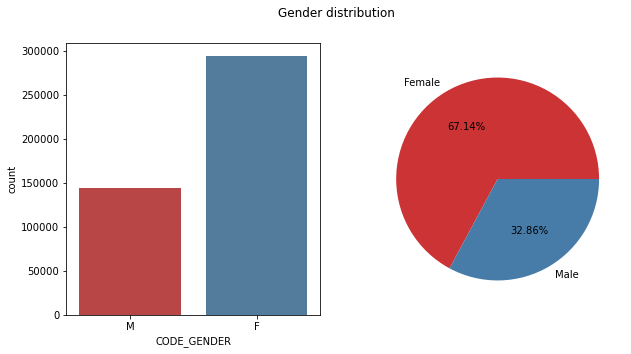

In [135]:
gender = df.CODE_GENDER.value_counts()

plt.figure(figsize=(10,5))
plt.suptitle('Gender distribution')

# first plot, count plot
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = df)

#Second subplot, piechart
plt.subplot(1,2,2)
plt.pie(gender, labels = ['Female', 'Male'], autopct='%1.2f%%')


plt.show()

There are more female applicants than male applicants, interesting


### Income distribution analysis

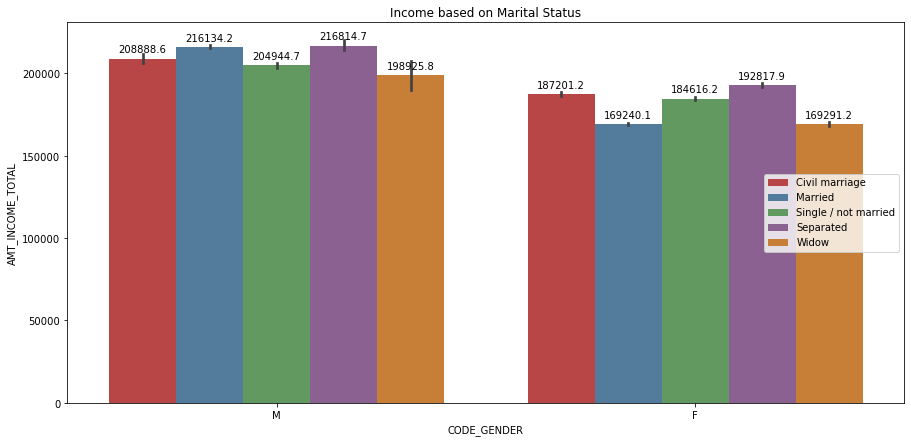

In [133]:
plt.figure(figsize=(15,7))                      #plot size
splot = sns.barplot(y= 'AMT_INCOME_TOTAL', x = 'CODE_GENDER',hue = 'NAME_FAMILY_STATUS',data = df)
plt.title('Income based on Marital Status')     #title

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.legend(loc=7)
plt.show()

Male applicants earn more than the female applicants and in both the cases seperated people earn more. What could be the reason for that. 

Lets look at the occupation of people based on marital status

In [7]:
#Occupation value counts
occupation_type = df.OCCUPATION_TYPE.value_counts()

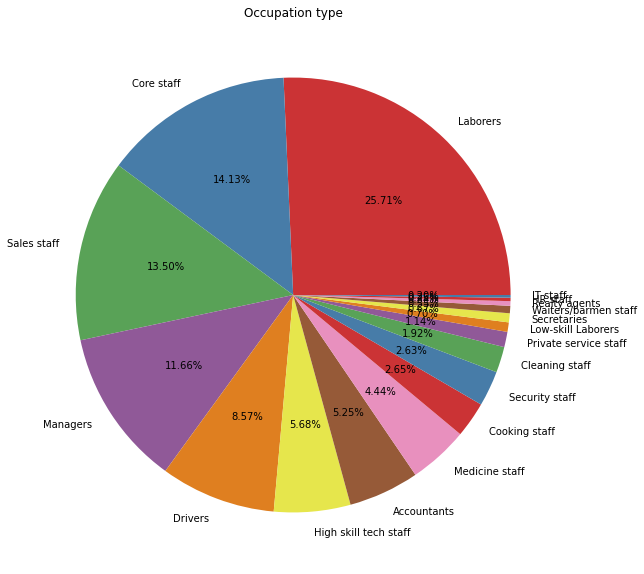

In [134]:
plt.figure(figsize=(15,10))   
plt.pie(occupation_type, labels = occupation_type.index, autopct='%1.2f%%')
plt.title('Occupation type')
plt.show()

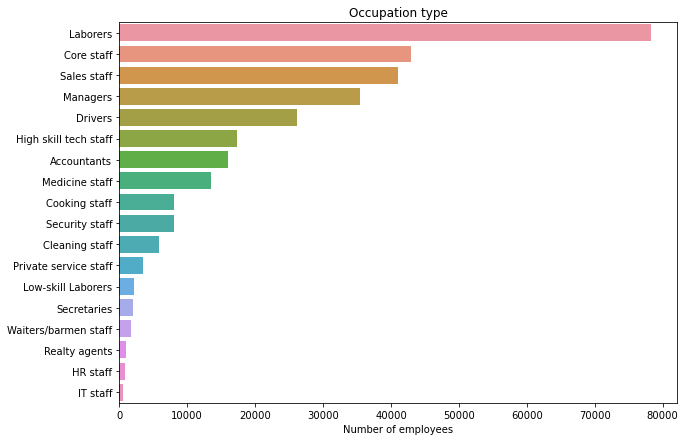

In [68]:
plt.figure(figsize=(10,7))   
sns.barplot(x=occupation_type,y=occupation_type.index)
plt.title('Occupation type')
plt.xlabel('Number of employees')
plt.show()

In [ ]:
#group by gender , occupation and marital status
grouped_occupation_salary = pd.DataFrame(df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].agg(['mean','count']))

#Rename the columns
grouped_occupation_salary.columns = ['average_salary','number_of_employees']

#reset the index
grouped_occupation_salary = grouped_occupation_salary.reset_index()

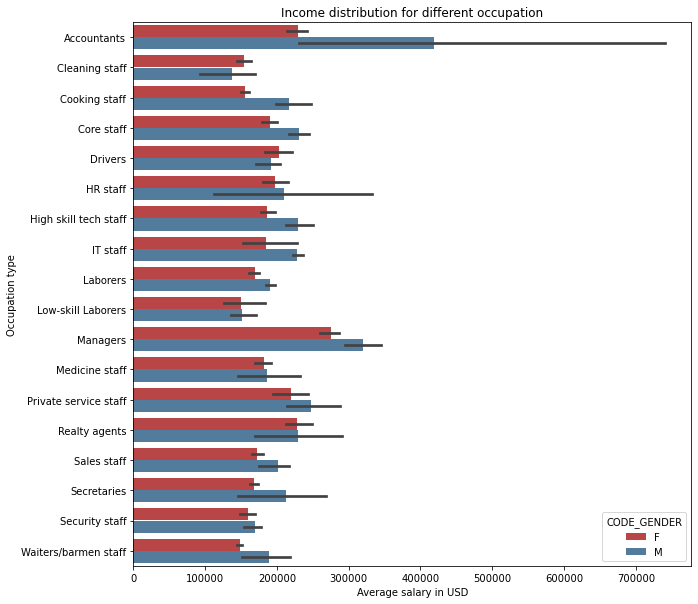

In [132]:
#Bar plot to compare male and female salaries 
plt.figure(figsize=(10,10))   
sns.barplot(hue = 'CODE_GENDER' , x = 'average_salary', y = 'OCCUPATION_TYPE', data = grouped_occupation_salary)
plt.title('Income distribution for different occupation')
plt.ylabel('Occupation type')
plt.xlabel('Average salary in USD')
plt.show()

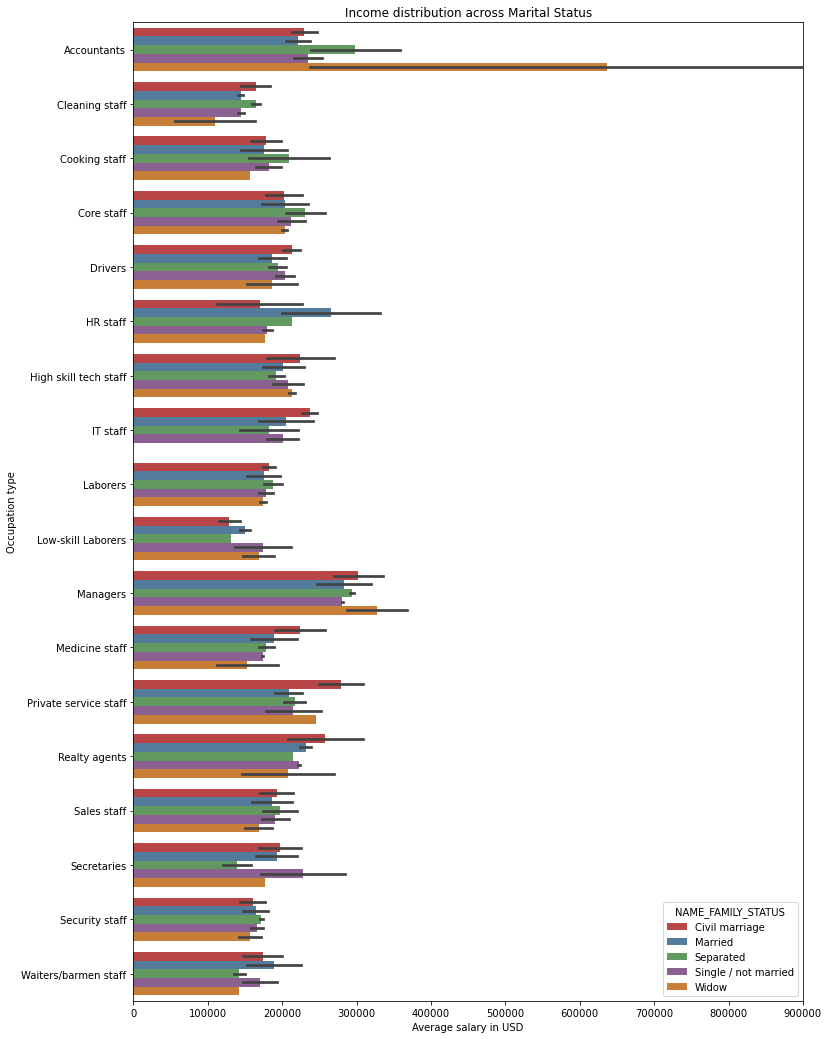

In [131]:
plt.figure(figsize=(12,18))   
sns.barplot(hue = 'NAME_FAMILY_STATUS' , x = 'average_salary', y = 'OCCUPATION_TYPE', data = grouped_occupation_salary)
plt.title('Income distribution across Marital Status')
plt.ylabel('Occupation type')
plt.xlabel('Average salary in USD')
plt.xlim(0,900000)
plt.show()

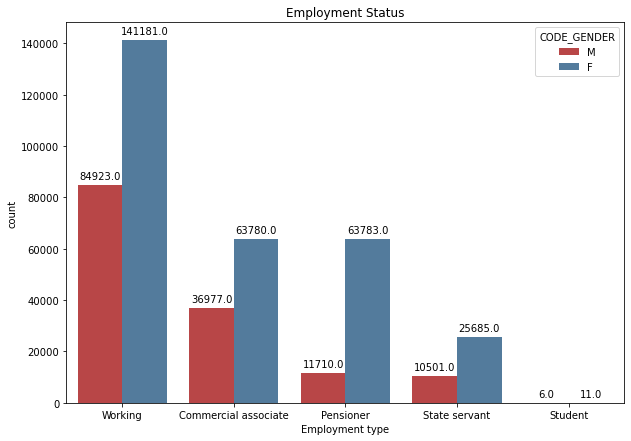

In [130]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x = 'NAME_INCOME_TYPE',hue = 'CODE_GENDER', data = df)

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Employment Status')
plt.xlabel('Employment type')
plt.show()

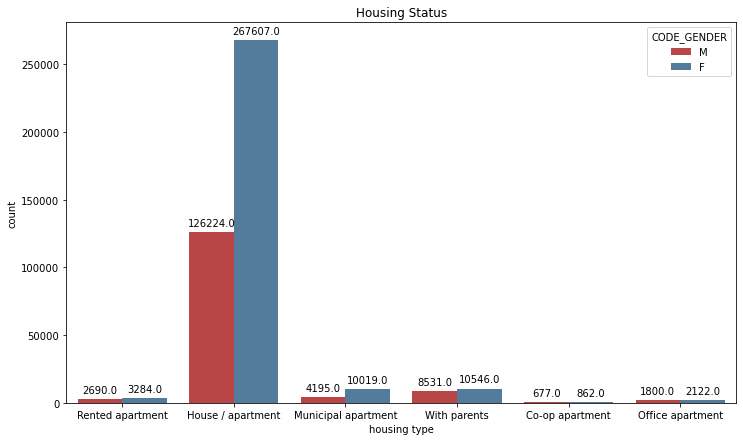

In [129]:
plt.figure(figsize=(12,7))
splot = sns.countplot(x = 'NAME_HOUSING_TYPE',hue = 'CODE_GENDER', data = df)

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Housing Status')
plt.xlabel('housing type')
plt.show()

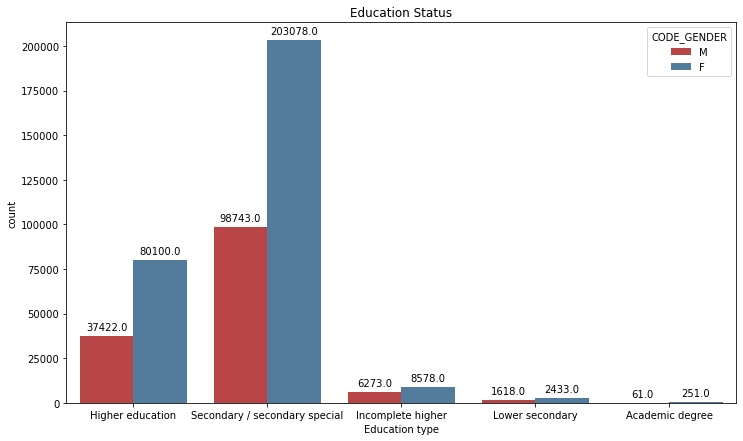

In [128]:
plt.figure(figsize=(12,7))
splot = sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = df)

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Education Status')
plt.xlabel('Education type')
plt.show()

In [95]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

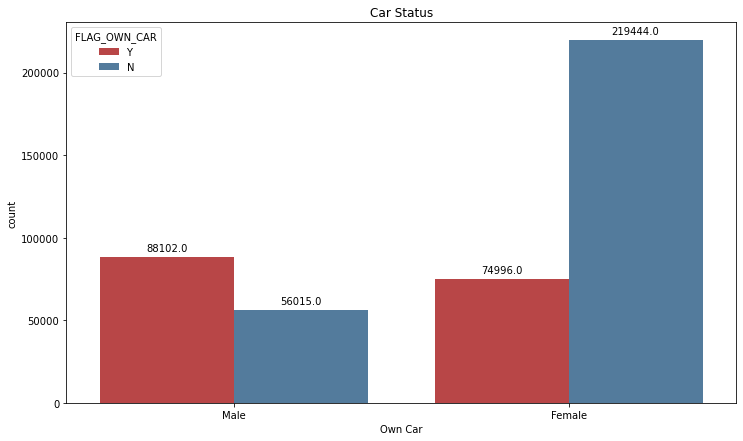

In [125]:

plt.figure(figsize=(12,7))
sns.set_palette("Set1", 8, .75)
splot = sns.countplot(hue = 'FLAG_OWN_CAR', x = 'CODE_GENDER', data = df)


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Car Status')
plt.xlabel('Own Car')
plt.xticks([0,1],['Male', 'Female'])
plt.show()

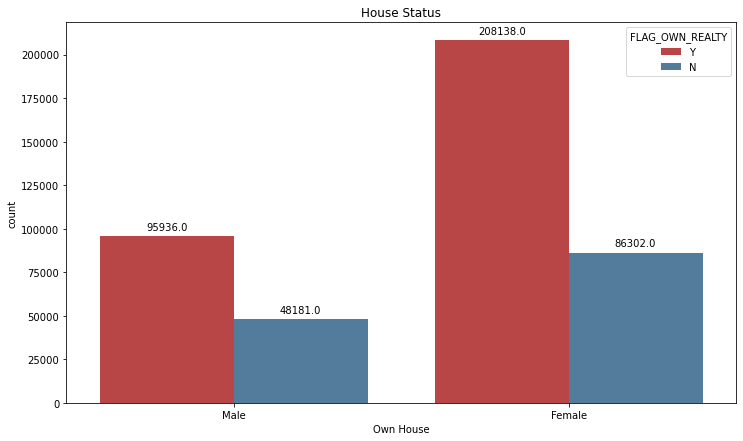

In [126]:
plt.figure(figsize=(12,7))
splot = sns.countplot(hue = 'FLAG_OWN_REALTY', x = 'CODE_GENDER', data = df)

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('House Status')
plt.xlabel('Own House')
plt.xticks([0,1],['Male', 'Female'])
plt.show()

In [113]:
df[['CODE_GENDER','FLAG_OWN_REALTY','NAME_HOUSING_TYPE']].groupby(['NAME_HOUSING_TYPE','FLAG_OWN_REALTY']).agg(['count'])

CODE_GENDER
                                          count
NAME_HOUSING_TYPE   FLAG_OWN_REALTY            
Co-op apartment     N                       528
                    Y                      1011
House / apartment   N                    108880
                    Y                    284951
Municipal apartment N                      8377
                    Y                      5837
Office apartment    N                      1859
                    Y                      2063
Rented apartment    N                      3234
                    Y                      2740
With parents        N                     11605
                    Y                      7472

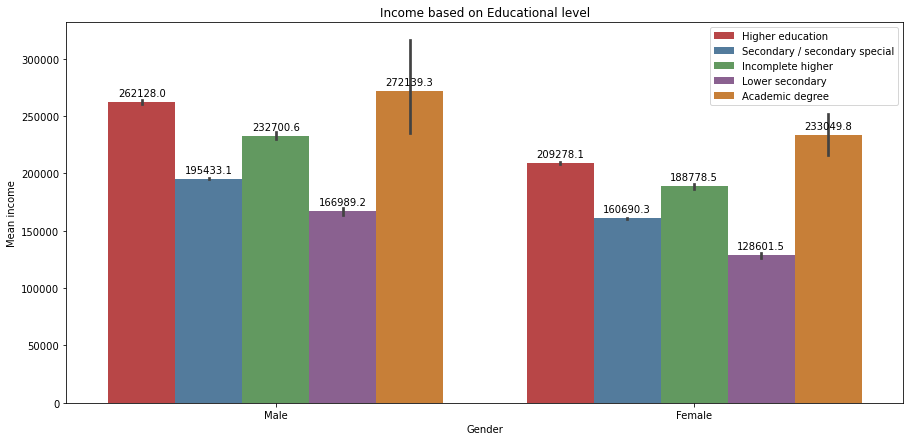

In [127]:
plt.figure(figsize=(15,7))                      #plot size
splot = sns.barplot(y= 'AMT_INCOME_TOTAL', x = 'CODE_GENDER',hue = 'NAME_EDUCATION_TYPE',data = df)
plt.title('Income based on Educational level')     #title

#annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.legend()
plt.xticks([0,1],['Male', 'Female'])
plt.ylabel('Mean income')
plt.xlabel('Gender')
plt.show()